# Лабораторна робота 1

## Регресійні моделі

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### 1. Завантажити дані

In [6]:
def reading_text_pd(directory):

    df = pd.read_csv(directory, sep = ',' )
    
    print(df)
    return df

In [7]:
df1 = reading_text_pd("./saveecobot_18576.csv")

         device_id   phenomenon    value            logged_at  value_text
0            18576          pm1   8.5122  2021-08-03 14:22:00         NaN
1            18576         pm25  10.5610  2021-08-03 14:22:00         NaN
2            18576         pm10  11.2195  2021-08-03 14:22:00         NaN
3            18576  temperature  25.5976  2021-08-03 14:22:00         NaN
4            18576     humidity  40.1187  2021-08-03 14:22:00         NaN
...            ...          ...      ...                  ...         ...
7345156      18576         pm25   9.9670  2025-09-20 09:24:00         NaN
7345157      18576         pm10  16.4230  2025-09-20 09:24:00         NaN
7345158      18576          pm1  10.4410  2025-09-20 09:25:00         NaN
7345159      18576         pm25  10.9810  2025-09-20 09:25:00         NaN
7345160      18576         pm10  17.7850  2025-09-20 09:25:00         NaN

[7345161 rows x 5 columns]


### 2. Проаналізувати завантажений датасет (форматування, видалення пустих значень тощо)

In [8]:
print(df1.isna().sum())

device_id           0
phenomenon          0
value               0
logged_at           0
value_text    7345161
dtype: int64


In [9]:
df1['value_text'] = df1['value_text'].fillna(0)

In [10]:
print(df1.isna().sum())

device_id     0
phenomenon    0
value         0
logged_at     0
value_text    0
dtype: int64


In [11]:
df1

,device_id,phenomenon,value,logged_at,value_text
0,18576,pm1,8.5122,2021-08-03 14:22:00,0.0
1,18576,pm25,10.5610,2021-08-03 14:22:00,0.0
2,18576,pm10,11.2195,2021-08-03 14:22:00,0.0
3,18576,temperature,25.5976,2021-08-03 14:22:00,0.0
4,18576,humidity,40.1187,2021-08-03 14:22:00,0.0
...,...,...,...,...,...
7345156,18576,pm25,9.9670,2025-09-20 09:24:00,0.0
7345157,18576,pm10,16.4230,2025-09-20 09:24:00,0.0
7345158,18576,pm1,10.4410,2025-09-20 09:25:00,0.0
7345159,18576,pm25,10.9810,2025-09-20 09:25:00,0.0


### 3. 
- Знайти можливі залежності між забруднювачами повітря 
- Отримати регресійну модель залежності, використавши частину набору даних на навчання, іншу частину – на тестування моделі Залежність забрудника від часу дня (зранку повітря брудніше ніж вночі – це припущення. Обгрунтувати або спростувати його).
- Залежність одного забрудника від іншого
- Отримати чисельні оцінки (RMSE, R^2) отриманої моделі.


In [12]:
df1_wide = df1.pivot_table(
    index='logged_at',    
    columns='phenomenon', 
    values='value'
).reset_index()
df1_wide

phenomenon,logged_at,humidity,pm1,pm10,pm25,pressure_pa,temperature
0,2021-08-03 14:22:00,40.1187,8.5122,11.2195,10.5610,996112.2469,25.5976
1,2021-08-03 14:24:00,39.9173,7.8261,9.5000,9.0652,996078.9331,25.6382
2,2021-08-03 14:26:00,39.4902,7.8889,8.8889,8.8889,996029.1706,25.5806
3,2021-08-03 14:28:00,39.9061,7.1818,8.9091,8.7273,996016.0062,25.5651
4,2021-08-03 14:32:00,38.9148,7.0000,8.5000,8.0000,996050.0380,25.7803
...,...,...,...,...,...,...,...
1449111,2025-09-20 09:21:00,NaN,9.4320,17.1310,10.3450,NaN,NaN
1449112,2025-09-20 09:22:00,NaN,9.3820,17.3570,10.4320,NaN,NaN
1449113,2025-09-20 09:23:00,NaN,8.8100,16.4640,9.8670,NaN,NaN
1449114,2025-09-20 09:24:00,NaN,9.1870,16.4230,9.9670,NaN,NaN


In [13]:
print(df1_wide.isna().sum())

phenomenon
logged_at           0
humidity       449718
pm1               278
pm10              288
pm25              262
pressure_pa    449717
temperature    449695
dtype: int64


In [14]:
df1_wide = df1_wide.fillna(0)
print(df1_wide.isna().sum())

phenomenon
logged_at      0
humidity       0
pm1            0
pm10           0
pm25           0
pressure_pa    0
temperature    0
dtype: int64


In [15]:
x = df1_wide['pm10'].values.reshape(-1, 1)  
y = df1_wide['pm25'].values                

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
print(f" Коефіцієнт перетину Intercept (b0): {model.intercept_}")
print(f" Нахил Slope (b1): {model.coef_[0]}")

r2_train = model.score(x_train, y_train)
print(f" R^2 на тренувальних даних: {r2_train:.3f}")

 Коефіцієнт перетину Intercept (b0): -1.919429347418225
 Нахил Slope (b1): 0.7719456601095955
 R^2 на тренувальних даних: 0.930


In [18]:
y_pred = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"RMSE на тестових даних: {rmse:.3f}")
print(f"R^2 на тестових даних: {r2_test:.3f}")

RMSE на тестових даних: 3.150
R^2 на тестових даних: 0.931


In [ ]:
df1_wide['logged_at'] = pd.to_datetime(df1_wide['logged_at'])
df1_wide['hour'] = df1_wide['logged_at'].dt.hour
print(df1_wide[['logged_at', 'hour']])

phenomenon           logged_at  hour
0          2021-08-03 14:22:00    14
1          2021-08-03 14:24:00    14
2          2021-08-03 14:26:00    14
3          2021-08-03 14:28:00    14
4          2021-08-03 14:32:00    14
...                        ...   ...
1449111    2025-09-20 09:21:00     9
1449112    2025-09-20 09:22:00     9
1449113    2025-09-20 09:23:00     9
1449114    2025-09-20 09:24:00     9
1449115    2025-09-20 09:25:00     9

[1449116 rows x 2 columns]


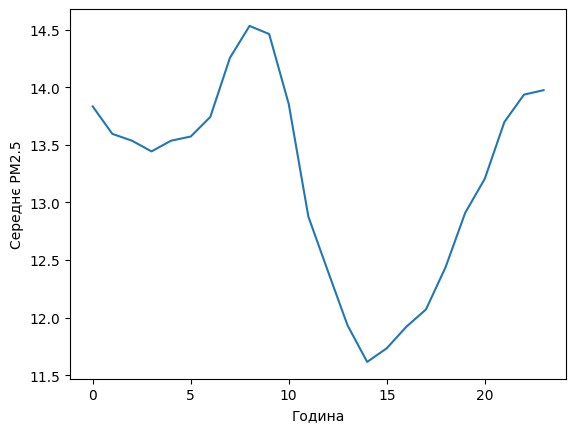

In [ ]:
hour_mean = df1_wide.groupby('hour')['pm25'].mean()
plt.plot(hour_mean.index, hour_mean.values)
plt.xlabel('Година')
plt.ylabel('Середнє PM2.5')
plt.show()